# 一元线性回归

In [47]:
import matplotlib.pyplot as plt

## 数据生成

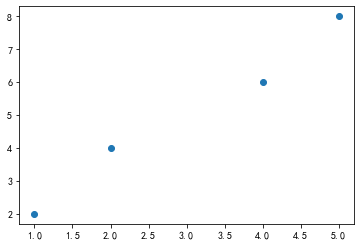

In [48]:
x1=[[1],[2],[4],[5]]
y1=[2,4,6,8]
plt.scatter(x1,y1)
plt.show()

注意 x 的书写方式，是为了与多元一致，一个y对应多个x,三元回归方程的自变量示例
```
 X = [[1, 2, 3], [2, 4, 5], [4, 6, 8], [5, 7, 9]]
```


## 模型训练

In [49]:
# 线性回归模型训练
from sklearn.linear_model import LinearRegression
regr=LinearRegression()
regr.fit(x1,y1)

LinearRegression()

## 模型预测

预测，注意 自变量还是要写成 二维数组形式

In [50]:
# 预测一个
regr.predict([[1.5]])

array([2.9])

In [51]:
# 预测多个
regr.predict([[1.5],[2.5],[4.5]])

array([2.9, 4.3, 7.1])

## 模型可视化

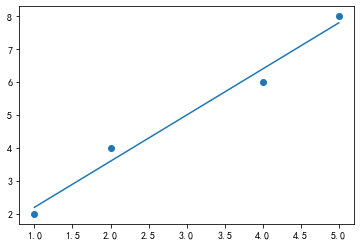

In [52]:
plt.scatter(x1,y1)
plt.plot(x1,regr.predict(x1))
plt.show()

## 线性回归方程构造

In [53]:
# 系数
regr.coef_

array([1.4])

In [54]:
# 截距
regr.intercept_

0.7999999999999989

In [55]:
print("y="+str(regr.coef_[0])+"x+"+str(regr.intercept_))

y=1.4000000000000004x+0.7999999999999989


# 案例

In [60]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#读取数据
df=pd.read_excel('./data/IT行业收入表.xlsx')

In [61]:
df.head()

,工龄,薪水
0,0.0,10808
1,0.1,13611
2,0.2,12306
3,0.3,12151
4,0.3,13057


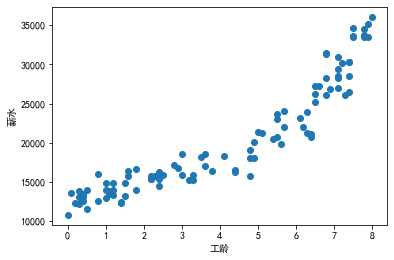

In [62]:
X=df[['工龄']]
y=df['薪水']
X=np.array(X)
y=np.array(y)
# 数据可视化
plt.rcParams['font.sans-serif'] = ['SimHei']#正常显示中文标签,SimHei表示黑体
plt.scatter(X,y)
plt.xlabel('工龄')
plt.ylabel('薪水')
plt.show()

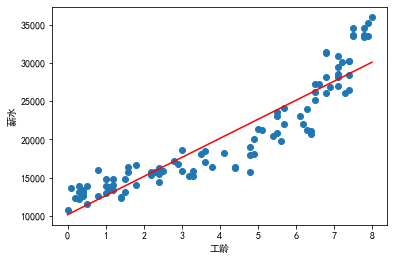

y= 2497.1513476046866 x+ 10143.131966873787


In [63]:
from sklearn.linear_model import LinearRegression
regr=LinearRegression()
# 训练模型
regr.fit(X,y)
# 模型可视化
plt.scatter(X,y)
plt.plot(X,regr.predict(X),color='red')
plt.xlabel('工龄')
plt.ylabel('薪水')
plt.show()
# 回归方差表达式
print("y=",regr.coef_[0],"x+",regr.intercept_)

一元线性回归模型 的优化就是 多元线性回归模型，以二元线程方差为例 $y=a*x^2+b*x+c$

In [64]:
X[:5]

array([[0. ],
       [0.1],
       [0.2],
       [0.3],
       [0.3]])

In [65]:
from sklearn.preprocessing import PolynomialFeatures #引入多项式模块
plot_reg=PolynomialFeatures(2) #设置多项式最高次项 为 2
X_=plot_reg.fit_transform(X) # 将X转化为二维数组，第一列表示 X^0 第二列表示 X^1 第三列表示 X^2
X_[:5]

array([[1.  , 0.  , 0.  ],
       [1.  , 0.1 , 0.01],
       [1.  , 0.2 , 0.04],
       [1.  , 0.3 , 0.09],
       [1.  , 0.3 , 0.09]])

note：第一列表示 X^0，没有特殊含义，不会对实际结果产生影响

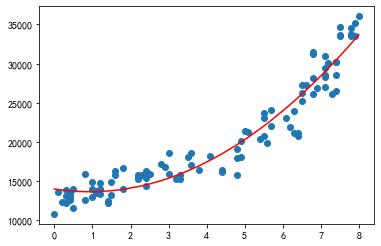

In [66]:
regr=LinearRegression()
regr.fit(X_,y)
plt.scatter(X,y)
plt.plot(X,regr.predict(X_),color='red')
plt.show()

regr.coef_ 输出三个数
- 第一个0是常数项系数，这也是为什么之前说X_的常数项不会对分析结果产生影响
- 第二个是 X^1 的系数
- 第三个是 X^2 的系数

In [67]:
regr.coef_

array([   0.        , -743.68080444,  400.80398224])

In [68]:
regr.intercept_

13988.159332096886

In [69]:
print("y=",regr.coef_[2],"x^2=",regr.coef_[1],"x+",regr.intercept_)

y= 400.8039822436372 x^2= -743.6808044431452 x+ 13988.159332096886


# 线性回归模型评估

主要以3个值作为评判标准：
- R-squared（即统计学中的R2）
- Adj.R-squared（即Adjusted R2）
- P值

其中R-squared和Adj.R-squared用来衡量线性拟合的优劣，P值用来衡量特征变量的显著性。

R-squared和Adj.R-squared的取值范围为0～1，它们的值越接近1，则模型的拟合程度越高；

P值在本质上是个概率值，其取值范围也为0～1，P值越接近0，则特征变量的显著性越高

## 评估一元线性回归

In [71]:
import statsmodels.api as sm
X2=sm.add_constant(X)
est=sm.OLS(y,X2).fit()
est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.855
Model:                            OLS   Adj. R-squared:                  0.854
Method:                 Least Squares   F-statistic:                     578.5
Date:                Wed, 07 Sep 2022   Prob (F-statistic):           6.69e-43
Time:                        22:57:45   Log-Likelihood:                -930.83
No. Observations:                 100   AIC:                             1866.
Df Residuals:                      98   BIC:                             1871.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.014e+04    507.633     19.981      0.000    9135.751    1.12e+04
x1          2497.1513    103.823     24.052      0.000    2291.118    2703.185
==============================================================================
Omnibus:                        0.287   Durbin-Watson:                   0.555
Prob(Omnibus):                  0.867   Jarque-Bera (JB):                0.463
Skew:                           0.007   Prob(JB):                        0.793
Kurtosis:                       2.667   Cond. No.                         9.49
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

通常只需要关注 R-squared、Adj. R-squared，可以看出线性模型拟合程度较高

这里的P值有两个，常数项（const）和特征变量（工龄）的P值都约等于0，所以这两个变量都和目标变量（薪水）显著相关，即真的具有相关性，而不是由偶然因素导致的。

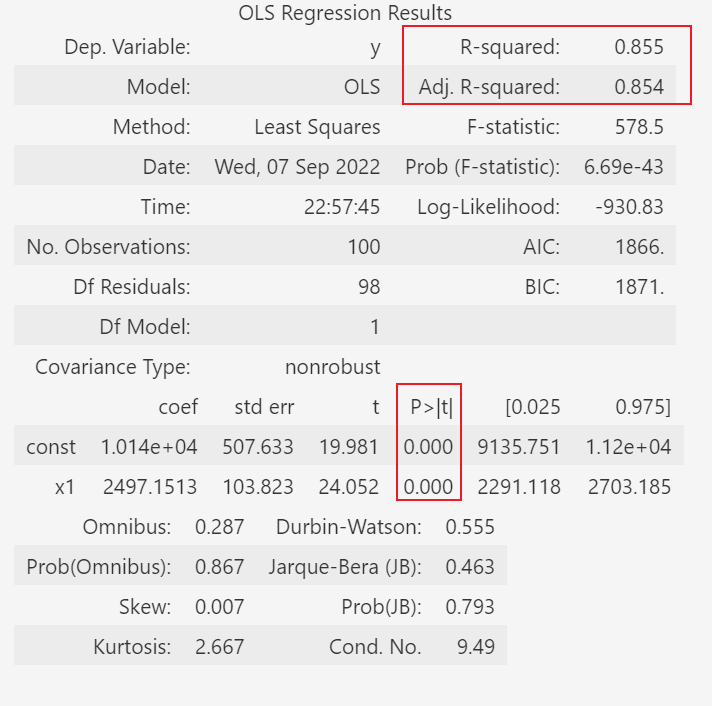

## 评估二元线性回归

In [72]:
import statsmodels.api as sm
X2=sm.add_constant(X_)
est=sm.OLS(y,X2).fit()
est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.931
Model:                            OLS   Adj. R-squared:                  0.930
Method:                 Least Squares   F-statistic:                     654.8
Date:                Wed, 07 Sep 2022   Prob (F-statistic):           4.70e-57
Time:                        23:02:19   Log-Likelihood:                -893.72
No. Observations:                 100   AIC:                             1793.
Df Residuals:                      97   BIC:                             1801.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.399e+04    512.264     27.307      0.000     1.3e+04     1.5e+04
x1          -743.6808    321.809     -2.311      0.023   -1382.383    -104.979
x2           400.8040     38.790     10.333      0.000     323.816     477.792
==============================================================================
Omnibus:                        2.440   Durbin-Watson:                   1.137
Prob(Omnibus):                  0.295   Jarque-Bera (JB):                2.083
Skew:                          -0.352   Prob(JB):                        0.353
Kurtosis:                       3.063   Cond. No.                         102.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

可以看到 R-squared、Adj. R-squared比线性模型高，因此二元线性回归拟合的更好

# 获取 R-squared 更通用的方式

In [75]:
from sklearn.metrics import r2_score
r2=r2_score(y,regr.predict(X_))
r2

0.9310387116075503